# Binary Classification : Breast Cancer Detection

##  Step 0 : Import necessary libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Step 1 : Load the dataset

In [6]:
# load Breast Cancer Dataset as a Data Frame 
Breast_cancer = load_breast_cancer(as_frame = True)
data_df = Breast_cancer.frame

In [7]:
# Display the first 5 rows of the Dataframe
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

## Step 2 : Get Started with the Dataset

In [8]:
# Get the Volume of the Dataset 
data_df.shape

(569, 31)

In [40]:
# Basic Information about the Dataset 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Summary statistics of the dataset
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
# Check for missing values
data_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Step 3 : Explore & Visualize the Data

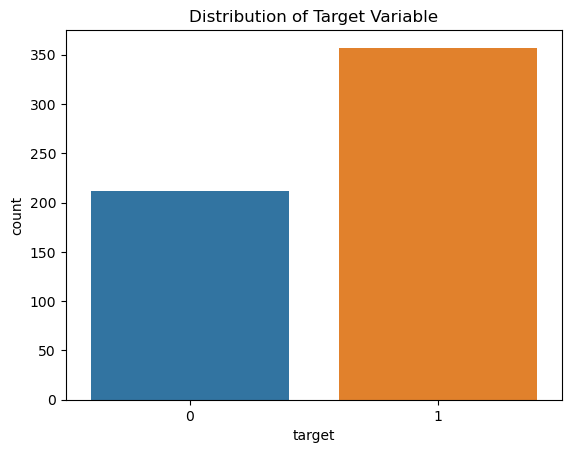

In [20]:
# Count plot of the target variable to see Target Distribution
sns.countplot(x='target', data= data_df) ###Replace by dataset dataframe##)
plt.title('Distribution of Target Variable')
plt.show()

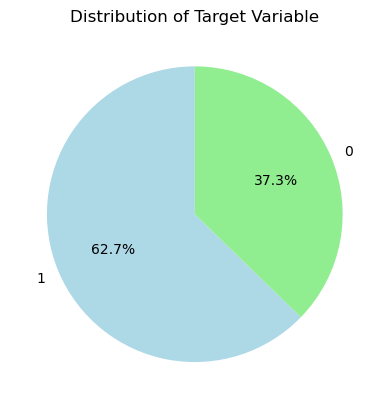

In [21]:
# Pie chart of the target variable to get pourcentage of Distribution
data_df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


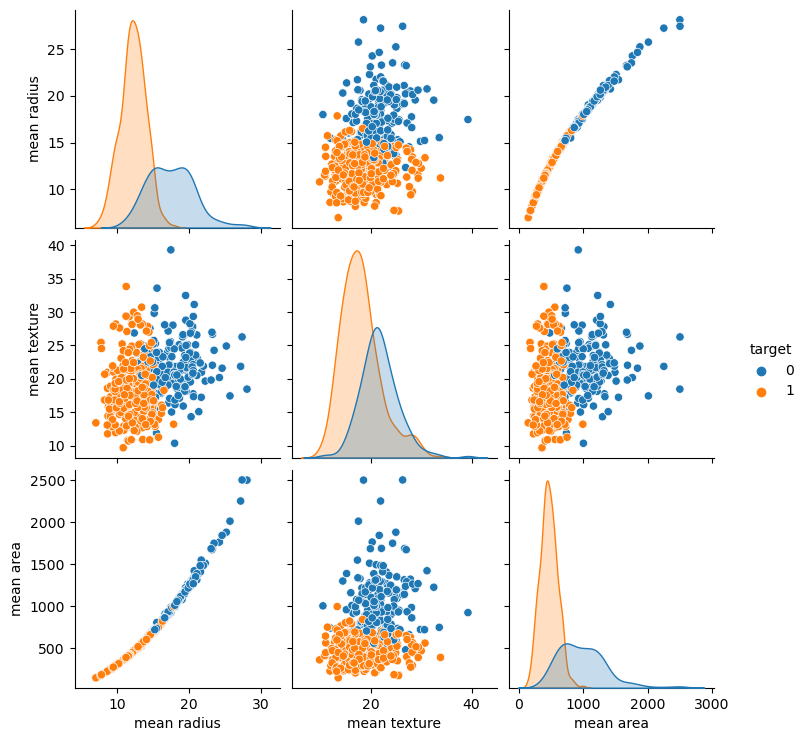

In [26]:
### plot the pairwise relationships between the selected features and color the points based on the target variable 

# Selecting three features along with the target variable
# select 3 features 
selected_features = ['mean radius', 'mean texture', 'mean area', 'target']
data_subset = data_df[selected_features]

# Creating a pair plot
sns.pairplot(data_subset, hue='target')
plt.show()


## Step 4 : Split the dataset into training and testing sets

In [28]:
#Separate features and target variable
X = data_df.drop(columns='target') #Remove target and keep all the rest of the column
y = data_df['target']

In [29]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Train Logistic Regression Model

In [30]:
# Initialize the logistic regression model:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 6: Predict on testing set

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

## Step 7: Evaluate the model

In [38]:
### Calculate the number and pourcentage of correct and incorrect predictions

correct_predictions = np.sum(y_test == y_pred)
incorrect_predictions = len(y_test) - correct_predictions

# Calculate the percentage of correct predictions
percentage_correct = (correct_predictions / len(y_test)) * 100
percentage_incorrect = (incorrect_predictions / len(y_test)) * 100


# Create a DataFrame
results = pd.DataFrame({
    'Predicitions': ['Correct Predictions', 'Incorrect Predictions'],
    'Count': [correct_predictions, incorrect_predictions],
    'Percentage': [percentage_correct, percentage_incorrect]
})

# Display the DataFrame
results.head()


,Predicitions,Count,Percentage
0,Correct Predictions,109,95.614035
1,Incorrect Predictions,5,4.385965


In [40]:
# Create a DataFrame with actual and predicted values

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df

,Actual,Predicted
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1
...,...,...
486,1,1
75,0,0
249,1,1
238,1,0


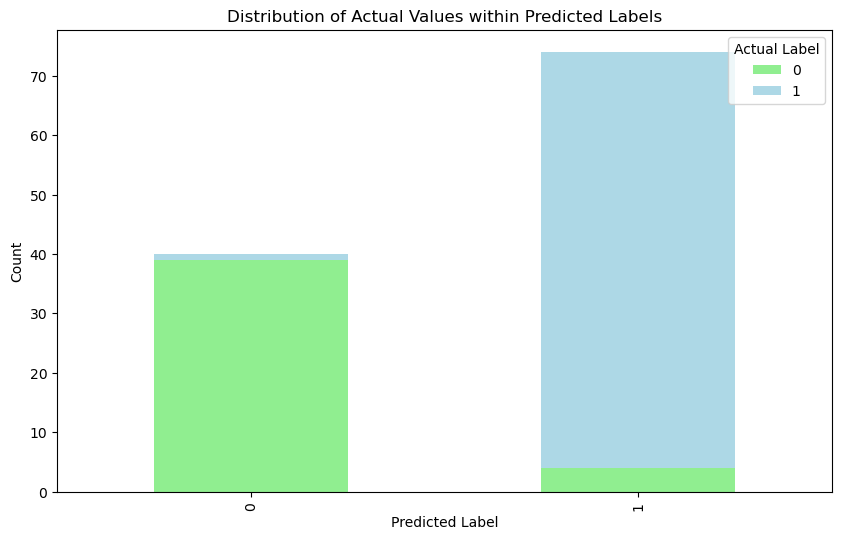

In [41]:
# Group by predicted values and plot the distribution of actual positives and negatives within each predicted category :

results_grouped = results_df.groupby('Predicted')['Actual'].value_counts().unstack().fillna(0)

results_grouped.plot(kind='bar', stacked=True, color=['lightgreen', 'lightblue'], figsize=(10, 6))
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Actual Values within Predicted Labels')
plt.legend(title='Actual Label', loc='upper right')
plt.show()


In [ ]:
y_pred_regression = model.predict(X_test)

In [ ]:
# Function to calculate results and return as a dictionary
def calculate_results(y_test, y_pred, model_name):
    correct_predictions = np.sum(y_test == y_pred)
    incorrect_predictions = len(y_test) - correct_predictions
    percentage_correct = (correct_predictions / len(y_test)) * 100
    percentage_incorrect = (incorrect_predictions / len(y_test)) * 100
    
    results = {
        'Model': model_name,
        'Correct Predictions': correct_predictions,
        'Incorrect Predictions': incorrect_predictions,
        'Percentage Correct': percentage_correct,
        'Percentage Incorrect': percentage_incorrect
    }
    
    return results

# Collect results for each model
results_list = []
results_list.append(calculate_results(y_test, y_pred_regression, model))

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
results_df